## Energy Disaggregation (Exaplanatory Data Analysis)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from datetime import datetime

### Import datasets

In [2]:
os.getcwd()

'/Users/nikossofias/Downloads/Αντιστασιακών φορτία'

In [3]:
hot_plate = pd.read_csv(r'/Users/nikossofias/Downloads/Αντιστασιακών φορτία/90642-3/Hotplate.csv')
water_heater = pd.read_csv(r'/Users/nikossofias/Downloads/Αντιστασιακών φορτία/90642-3/Total_house__Water_heater.csv')

In [4]:
### Preprocessing DATES

def combine_date_time(x, y):
        return datetime.combine(x, y)

def datetime_preprocessing(df):
    df['Time (UTC)'] = df['Time (UTC)'].apply(lambda x: datetime.strptime(x,'%H:%M:%S:%f').time())
    df['Date'] = pd.to_datetime(df['Date']).dt.date
    df['date_time'] = list(map(lambda x, y: combine_date_time(x, y), df['Date'].values.tolist(), df['Time (UTC)'].values.tolist()))
    df = df.drop(['Date', 'Time (UTC)'], axis=1)
    return df

hot_plate = datetime_preprocessing(hot_plate)
water_heater = datetime_preprocessing(water_heater)

In [10]:
water_heater = water_heater[['date_time','Active Power L1 (W)', 'Reactive Power L1 (Var)', 'Active Power L3 (W)']]
hot_plate = hot_plate[['date_time','Active Power L1 (W)']]

In [14]:
water_heater.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19559 entries, 0 to 19558
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date_time                19559 non-null  datetime64[ns]
 1   Active Power L1 (W)      19559 non-null  float64       
 2   Reactive Power L1 (Var)  19559 non-null  float64       
 3   Active Power L3 (W)      19559 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 611.3 KB


In [13]:
hot_plate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1945 entries, 0 to 1944
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date_time            1945 non-null   datetime64[ns]
 1   Active Power L1 (W)  1945 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 30.5 KB


array([<AxesSubplot:xlabel='date_time'>, <AxesSubplot:xlabel='date_time'>,
       <AxesSubplot:xlabel='date_time'>], dtype=object)

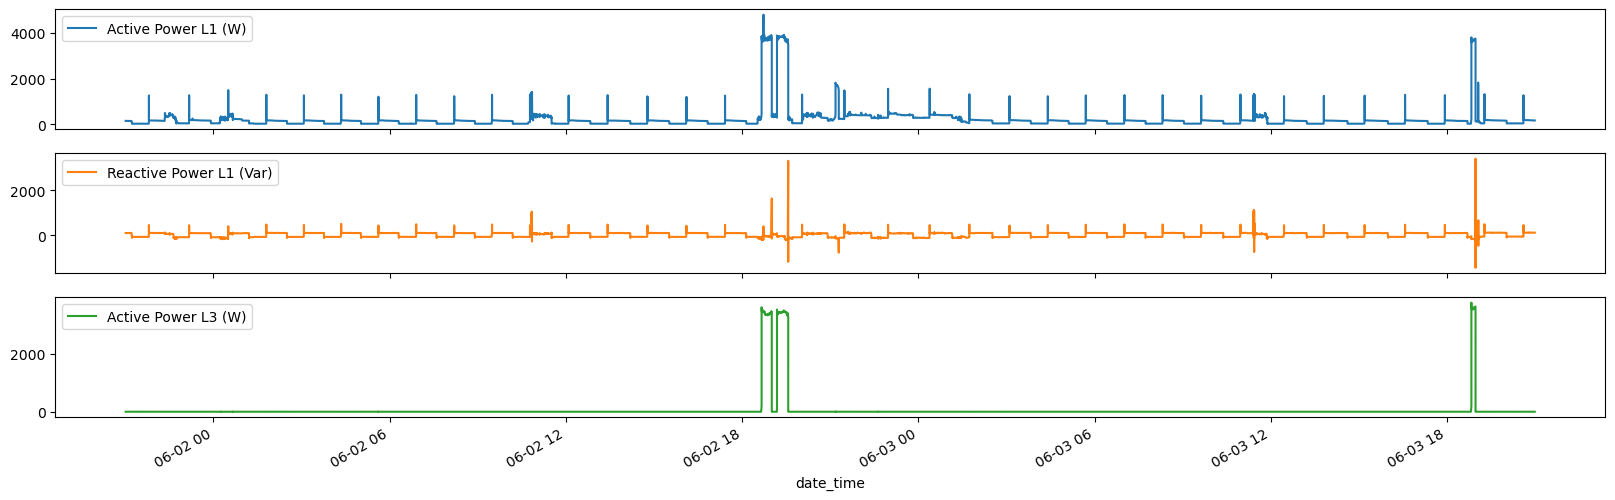

In [18]:
water_heater.plot(x='date_time',subplots=True,figsize=(20,6))

In [24]:
from turtle import color, width
from plotly import graph_objects as go

fig2 = go.Figure(
    data=[
        go.Line(
            name="Θερμοσύφωνας [W]",
            x=water_heater.date_time,
            y=water_heater['Active Power L3 (W)'],
            legendgroup=1,line=dict(color="black")
        ),
        go.Line(
            name="Ενεργός Ισχύς σπιτιού [W]",
            x=water_heater.date_time,
            y=water_heater['Active Power L1 (W)'],
            legendgroup=2,line=dict(color="red")
        ),
        go.Line(
            name="Άεργος Ισχύς σπιτιού [Var]",
            x=water_heater.date_time,
            y=water_heater['Reactive Power L1 (Var)'],
            legendgroup=3,line=dict(color="blue")
        ),
        go.Line(
            name="Ενεργός Ισχύς Μάτια Κουζίνας [W]",
            x=hot_plate.date_time,
            y=hot_plate['Active Power L1 (W)'],
            legendgroup=4,line=dict(color="green")
        ),
    ],
    layout=go.Layout(
        title="Κατανάλωση Σπιτιού & Θερμοσύφωνα",
        yaxis_title="Power [W]"
    )
)

fig2.update_layout(
    margin=dict(l=20, r=20, t=30, b=10)
)
fig2.show()

/Users/nikossofias/miniconda3/envs/env3_5_clone_v01/lib/python3.8/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.


